**TABLAS HASH**

**Que es un hash?**

Un hash es una cadena de texto única (una firma digital) generada por un algoritmo matemático a partir de un conjunto de datos.

Se utiliza para verificar la integridad y autenticidad de la información, ya que cualquier pequeño cambio en los datos de entrada produce un hash completamente diferente, y a partir del hash es computacionalmente imposible recuperar los datos originales.

* Las funciones de hash son unidireccionales y se emplean en ciberseguridad, blockchain, y para la validación de descargas y correos electrónicos.

Una tabla hash es una estructura de datos que almacena pares de (clave, valor) y utiliza una función hash para convertir una clave en un índice (o "hash") dentro de la tabla, permitiendo un acceso muy rápido y eficiente para buscar o insertar datos.

> Es como un diccionario que usa una función matemática para encontrar rápidamente un significado (valor) a través de una palabra (clave).

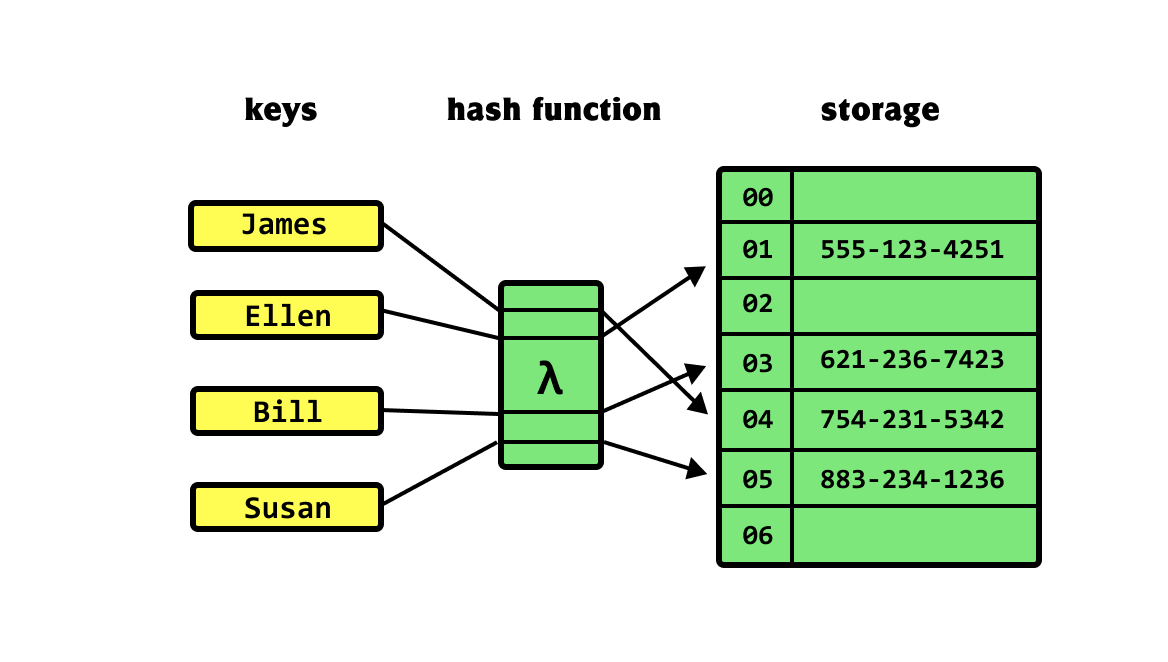

Una tabla hash es una estructura de datos que permite almacenar y acceder a información de forma rápida usando una clave única.
En lugar de buscar un dato recorriendo toda una lista, la tabla hash usa una función hash que convierte la clave en una posición de memoria (índice).

En Python, los diccionarios (dict) ya están implementados internamente como tablas hash.
Por eso:

Cuando haces mi_dict["clave"], Python no recorre todo el diccionario, sino que calcula un hash de "clave" y va directamente al valor.

Esto hace que las búsquedas, inserciones y eliminaciones sean muy rápidas (O(1) en promedio).

In [ ]:
# Diccionario (implementado como tabla hash)
telefonos = {
    "Ana": "6789-1234",
    "Luis": "6123-4567",
    "Marta": "6999-8888",
    "Cleidys": "2222-2222",
    "Jaqueline": "3333-4444",
    "Carlos": "6852-7854"
}

# Buscar directamente por clave
print("Teléfono de Ana:", telefonos["Ana"])

# Agregar un nuevo dato
telefonos["Carlos"] = "6333-2222"

# Verificar si alguien está en la tabla
if "Luis" in telefonos:
    print("Luis está en la agenda.")

# Eliminar un registro
del telefonos["Marta"]

# Mostrar agenda completa
print("Agenda actual:", telefonos)

**COLISIONES**


**¿Qué es una colisión en tablas hash?**

> Una tabla hash usa una función hash para convertir una clave (ej. "Ana") en un número entero que indica en qué "casilla" o bucket guardar el valor.

> El problema ocurre cuando dos claves diferentes generan el mismo número (índice) y eso se llama colisión.

**Ejemplo simple:**



In [ ]:
Función hash = longitud de la clave % 5

Clave "Ana" → 3 letras % 5 = 3

Clave "Luis" → 4 letras % 5 = 4

Clave "Marta" → 5 letras % 5 = 0

Clave "Pedro" → 5 letras % 5 = 0 #colisiona

¿Cómo se manejan las colisiones?

Existen varios métodos. Los más usados son:

1. Encadenamiento (chaining)

Cada bucket guarda una lista de elementos.
Si hay colisión, simplemente se agrega al final de la lista.

In [2]:
tabla = [[] for _ in range(5)]  # Creamos 5 buckets vacíos

def funcion_hash(clave):
    return len(clave) % 5

def insertar(clave, valor):
    indice = funcion_hash(clave)
    tabla[indice].append((clave, valor))

def buscar(clave):
    indice = funcion_hash(clave)
    for k, v in tabla[indice]:
        if k == clave:
            return v
    return None


# Insertamos
insertar("Marta", "6999-8888")
insertar("Pedro", "6777-1111")  # Colisión con Marta
insertar("Ana", "6789-1234")

print(tabla)
print("Teléfono de Pedro:", buscar("Pedro"))

[[('Marta', '6999-8888'), ('Pedro', '6777-1111')], [], [], [('Ana', '6789-1234')], []]
Teléfono de Pedro: 6777-1111


2. Dirección abierta (open addressing)

Si el bucket está ocupado, se busca otro espacio en la misma tabla.
El más simple es lineal: si está lleno en la posición i, se prueba en i+1, i+2, etc.


In [ ]:
tabla = [None] * 5  # 5 espacios vacíos

def funcion_hash(clave):
    return len(clave) % 5

def insertar(clave, valor):
    indice = funcion_hash(clave)
    original = indice
    while tabla[indice] is not None:  # Si está ocupado
        indice = (indice + 1) % len(tabla)  # Buscar siguiente
        if indice == original:  # Si volvimos al inicio → tabla llena
            raise Exception("Tabla llena")
    tabla[indice] = (clave, valor)

def buscar(clave):
    indice = funcion_hash(clave)
    original = indice
    while tabla[indice] is not None:
        k, v = tabla[indice]
        if k == clave:
            return v
        indice = (indice + 1) % len(tabla)
        if indice == original:
            break
    return None

# Insertamos
insertar("Marta", "6999-8888")
insertar("Pedro", "6777-1111")  # Colisión con Marta → se coloca en la siguiente celda
insertar("Ana", "6789-1234")

print(tabla)
print("Teléfono de Pedro:", buscar("Pedro"))


# Aquí "Marta" y "Pedro" no están en el mismo bucket, sino que "Pedro" se desplazó al siguiente espacio disponible.

Resumen:

Colisión = cuando dos claves caen en el mismo índice de la tabla hash.

Soluciones más comunes:

Encadenamiento → usar listas en cada bucket.

Dirección abierta → buscar otro espacio en la tabla (lineal, cuadrática, doble hash, etc.).

**2 formas mas comunes de manejar las colisiones:**

1. **Encadenamiento:** Cuando creamos nuestras tablas de hash, en lugar de asignarle un par clave-valor a cada espacio de la tabla le asignamos listas a cada espacio.

Si estamos manejando claves-valor aun cuando esta almacenado en una lista dentro de nuestra estructura este sabra que valor esta asoaciado a clada clave.

2. **Direccion abierta:** Cada elemento se alamacena solo, en un espacion unico, cad indice de la tabla tiene solo un elemento.

Aqui se hacen verificaciones, y si hay colisiones se busca en i + 1, i+2, i+3 ... hasta conseguir un espacio libre .

---

**Ejercicio: Anthony Aleman**

In [5]:
tabla = [[] for _ in range(10)] #creamos 10 buckets
def funcion_hash(producto):
    return len(producto) % 10 #modulo por el valor de la tabla
def insertar(producto, valor):
    indice = funcion_hash(producto)
    tabla[indice].append((producto, valor))

def buscar(producto):
    indice = funcion_hash(producto)
    for k, vl in tabla[indice]:
        if k == producto:
            return vl

    return None

insertar('Cafetera', '200')
insertar('laptop dell', '8000')
insertar('Audifonos JBL', '350')
insertar('Plancha', '150')
insertar('Reloj inteligente', '499')
print(tabla)

#
print('.'*30)

print(buscar('Plancha'))
print(buscar('Reloj inteligente'))

[[], [('laptop dell', '8000')], [], [('Audifonos JBL', '350')], [], [], [], [('Plancha', '150'), ('Reloj inteligente', '499')], [('Cafetera', '200')], []]
..............................
150
499
